## Feature Importance using XGBoost

In [77]:
# Importing the required libraries
from xgboost import XGBClassifier, plot_importance
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv('diabetes.csv')

In [79]:
# Creating testing and training datasets
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Outcome"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index] 

In [80]:
# Dropping the labels
X = strat_train_set.drop("Outcome", axis=1)
y = strat_train_set["Outcome"]

In [81]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X, y) # Using the training set

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [82]:
xgb.feature_importances_

array([0.06581058, 0.259091  , 0.07361045, 0.05611319, 0.09916078,
       0.1681152 , 0.11492383, 0.16317509], dtype=float32)

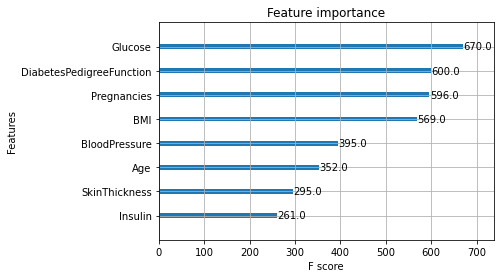

In [83]:
# Plotting the importance scores
plot_importance(xgb, max_num_features = 8)
plt.show()